# Assignment_01 - NLP

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk 
import re
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv('spam.csv',encoding='latin-1')
df1.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df1 = df1.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1)

In [4]:
df1 = df1.rename(columns={'v1': 'label', 'v2': 'text'})

In [5]:
df1 = df1.drop_duplicates(subset=['text'])

In [6]:
df1['label'].value_counts()

ham     4516
spam     653
Name: label, dtype: int64

## Top 10 words from Each Class. (With and Without Stopwords) 

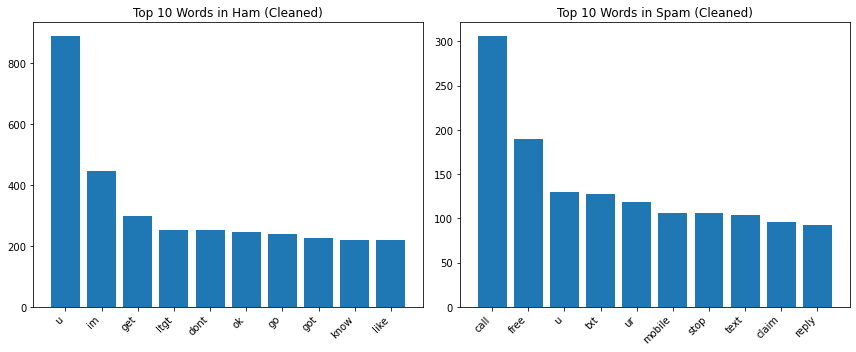

In [7]:
from collections import Counter
import matplotlib.pyplot as plt

stop_words = stopwords.words('english')

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def get_top_words(texts, n=10):
    words = ' '.join(clean_text(text) for text in texts).split()
    # Remove stop words
    words = [word for word in words if word not in stop_words]
    return Counter(words).most_common(n)

ham_top_words = get_top_words(df1[df1['label'] == 'ham']['text'])
spam_top_words = get_top_words(df1[df1['label'] == 'spam']['text'])

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(*zip(*ham_top_words))
plt.title('Top 10 Words in Ham (Cleaned)')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
plt.bar(*zip(*spam_top_words))
plt.title('Top 10 Words in Spam (Cleaned)')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

## Top 10 most frequent bi-rgams each class.

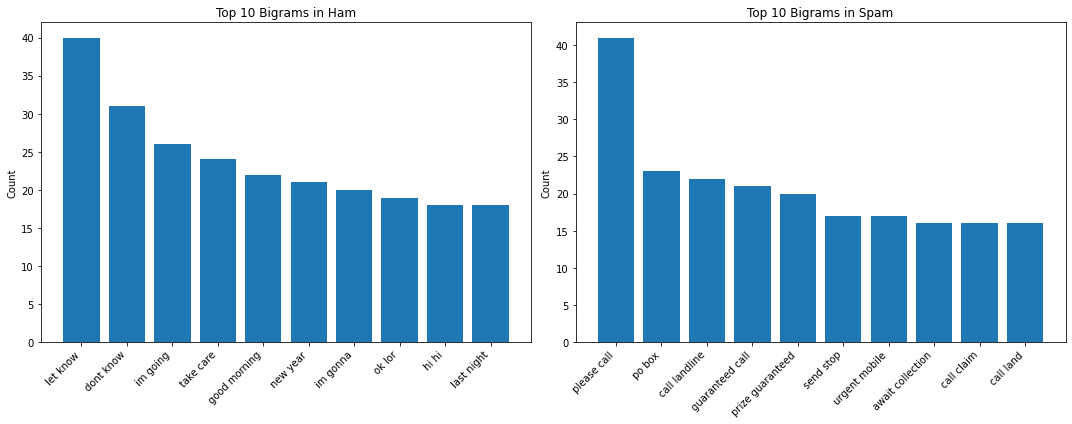

In [8]:
def get_top_bigrams(texts, n=10):
    cleaned_texts = [clean_text(text) for text in texts]
    
    vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words=stop_words)
    bigram_matrix = vectorizer.fit_transform(cleaned_texts)
    
    bigrams = vectorizer.get_feature_names_out()
    bigram_counts = bigram_matrix.sum(axis=0).A1
    bigram_dict = dict(zip(bigrams, bigram_counts))
    
    return Counter(bigram_dict).most_common(n)

ham_top_bigrams = get_top_bigrams(df1[df1['label'] == 'ham']['text'])
spam_top_bigrams = get_top_bigrams(df1[df1['label'] == 'spam']['text'])

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
ham_bigrams, ham_counts = zip(*ham_top_bigrams)
plt.bar(ham_bigrams, ham_counts)
plt.title('Top 10 Bigrams in Ham')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
spam_bigrams, spam_counts = zip(*spam_top_bigrams)
plt.bar(spam_bigrams, spam_counts)
plt.title('Top 10 Bigrams in Spam')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

## Top 10 most frequent tri-rgams each class.

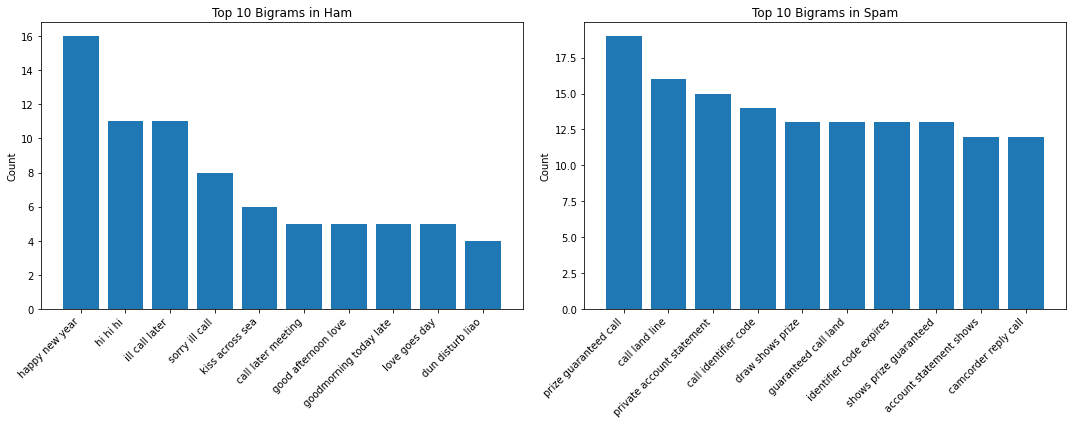

In [9]:
def get_top_bigrams(texts, n=10):
    cleaned_texts = [clean_text(text) for text in texts]
    
    vectorizer = CountVectorizer(ngram_range=(3, 3), stop_words=stop_words)
    bigram_matrix = vectorizer.fit_transform(cleaned_texts)
    
    bigrams = vectorizer.get_feature_names_out()
    bigram_counts = bigram_matrix.sum(axis=0).A1
    bigram_dict = dict(zip(bigrams, bigram_counts))
    
    return Counter(bigram_dict).most_common(n)

ham_top_bigrams = get_top_bigrams(df1[df1['label'] == 'ham']['text'])
spam_top_bigrams = get_top_bigrams(df1[df1['label'] == 'spam']['text'])

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
ham_bigrams, ham_counts = zip(*ham_top_bigrams)
plt.bar(ham_bigrams, ham_counts)
plt.title('Top 10 Bigrams in Ham')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
spam_bigrams, spam_counts = zip(*spam_top_bigrams)
plt.bar(spam_bigrams, spam_counts)
plt.title('Top 10 Bigrams in Spam')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Modelling

# BoW Model

In [10]:
f1_scores = []
models = ['BoW', 'BoW with TF-IDF', 'BoW with TF-IDF & Preprocessing']

In [11]:
X = df1['text']  
y = df1['label']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = CountVectorizer(stop_words='english')
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

raw_model = MultinomialNB()
raw_model.fit(X_train_bow, y_train)

y_pred = raw_model.predict(X_test_bow)

f1_bow = f1_score(y_test, y_pred,pos_label='spam')


In [12]:
f1_scores.append(f1_bow)

# BoW with TF-IDF

In [13]:
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

tfidf_model = MultinomialNB()
tfidf_model.fit(X_train_tfidf, y_train)
y_pred = tfidf_model.predict(X_test_tfidf)

f1_bow_tfidf = f1_score(y_test, y_pred,pos_label='spam')


In [14]:
f1_scores.append(f1_bow_tfidf)

# Cleaned BoW with TF-IDF

In [15]:
import string
def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [token.lower() for token in tokens]
    
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    
    tokens = [re.sub(r'\S+@\S+', '', token) for token in tokens]
    tokens = [re.sub(r'http\S+', '', token) for token in tokens]
    tokens = [re.sub(r'<.*?>', '', token) for token in tokens]
    tokens = [re.sub(r'\d+', '', token) for token in tokens]
    
    tokens = [token.translate(str.maketrans('', '', string.punctuation)) for token in tokens]
    tokens = [token for token in tokens if token]  
    
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return ' '.join(tokens)

In [21]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\4qin\AppData\Roaming\nltk_data...


True

In [22]:
X_train_preprocessed = [preprocess_text(text) for text in X_train]
X_test_preprocessed = [preprocess_text(text) for text in X_test]

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train_preprocessed)
X_test_tfidf = vectorizer.transform(X_test_preprocessed)

tfidf_model = MultinomialNB()
tfidf_model.fit(X_train_tfidf, y_train)
y_pred = tfidf_model.predict(X_test_tfidf)

In [23]:
f1_bow_tfidf_clean = f1_score(y_test, y_pred,pos_label='spam')

In [24]:
f1_scores.append(f1_bow_tfidf_clean)

In [25]:
f1_scores

[0.9395017793594306, 0.8627450980392157, 0.8549019607843137]

(0.0, 1.0)

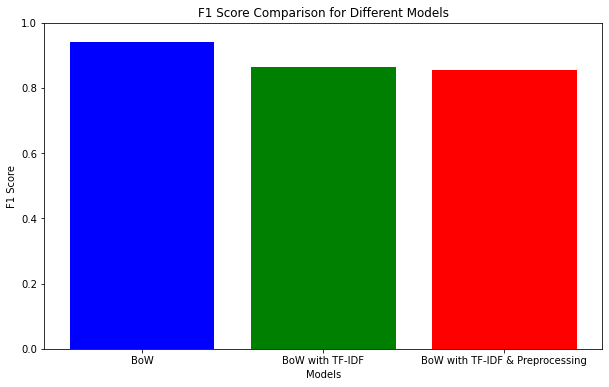

In [26]:
plt.figure(figsize=(10, 6))
bars = plt.bar(models, f1_scores, color=['blue', 'green', 'red'])

plt.title('F1 Score Comparison for Different Models')
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.ylim(0, 1)